In [166]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

本モジュールは、講義内容を理解するためのコード利用を想定しています。
適宜、数値を変えたりなどして変換結果が変わることを確認してみてください。
（コードの詳細や数理的説明は割愛します）

### 演算子の説明

In [175]:
10 // 3

3

In [178]:
2.5 // 1.1

2.0

In [184]:
np.array([1, 2]) @ np.array([3, 4])

11

### 1次元の等間隔空間データに対する離散ウェーブレット変換

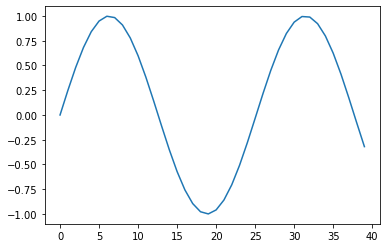

In [187]:
length = 40
y = np.sin(np.arange(length)/4)
plt.plot(y)
plt.show()

In [188]:
haar_scale = np.array([1.0,1.0]) / np.sqrt(2) #低周波に対応　　　　　
haar_wavelet = np.array([1.0,-1.0]) / np.sqrt(2) #高周波に対応 　　　

In [190]:
step = haar_wavelet.shape[0] # 要素数の2を取得
Y_l = np.zeros(length // step) # 0の配列を用意
Y_h = np.zeros(length // step) # 0の配列を用意

for i in range(length // step): # range(20)
    Y_l[i] = y[step*i:step*i+step] @ haar_scale #内積(低周波数側)
    Y_h[i] = y[step*i:step*i+step] @ haar_wavelet #内積（高周波数側）

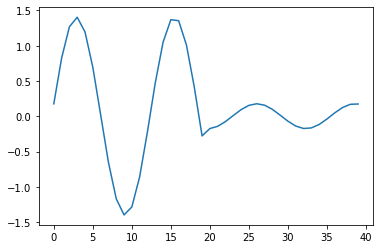

In [192]:
# 係数比較のための可視化
plt.plot(np.hstack([Y_l,Y_h]))
plt.show()

In [157]:
Y_lh = np.zeros(length // step**2)
Y_ll = np.zeros(length // step**2)

for i in range(length // step**2):
    Y_ll[i] = Y_l[step*i:step*i+step] @ haar_scale
    Y_lh[i] = Y_l[step*i:step*i+step] @ haar_wavelet

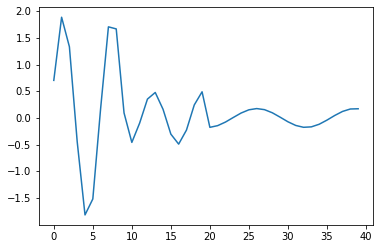

In [158]:
# 係数を比較するための可視化
plt.plot(np.hstack([Y_ll, Y_lh, Y_h]))
plt.show()

In [159]:
Y_llh = np.zeros(length // step**3)
Y_lll = np.zeros(length // step**3)

for i in range(length // step**3):
    Y_lll[i] = Y_ll[step*i:step*i+step] @ haar_scale
    Y_llh[i] = Y_ll[step*i:step*i+step] @ haar_wavelet

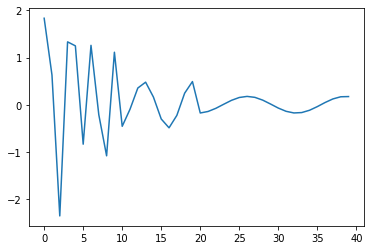

In [160]:
# 係数を比較するための可視化
plt.plot(np.hstack([Y_lll, Y_llh, Y_lh, Y_h]))
plt.show()

In [193]:
# 逆変換
y_rev = np.zeros(length)

for i in range(length // step):
    rev_l = Y_l[i]*haar_scale
    y_rev[step*i] = rev_l[0]
    y_rev[step*i+1] = rev_l[1]
    
    rev_h = Y_h[i]*haar_wavelet
    y_rev[step*i] += rev_h[0]
    y_rev[step*i+1] += rev_h[1]

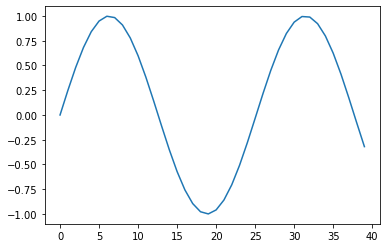

In [195]:
plt.plot(y_rev)
plt.show()

### 2次元の等間隔空間データに対する離散ウェーブレット変換

In [47]:
from PIL import Image
from matplotlib import pyplot as plt

#### 画像1

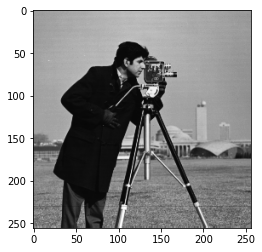

In [58]:
img = Image.open("./camera256.bmp")
img_array = np.array(img)
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [202]:
haar_scale = np.array([1.0,1.0]) / 2 #低周波に対応　　　　　
haar_wavelet = np.array([1.0,-1.0]) / 2 #高周波に対応 　　　

In [59]:
height,width = img_array.shape

In [60]:
tmp_l = np.zeros( [height,width//step] )
tmp_h = np.zeros( [height,width//step] )

for i in range(width // step):
    tmp_l[:,i] = img_array[:,step*i:step*i+step] @ haar_scale
    tmp_h[:,i] = img_array[:,step*i:step*i+step] @ haar_wavelet

img_array = np.hstack([tmp_l,tmp_h+127])

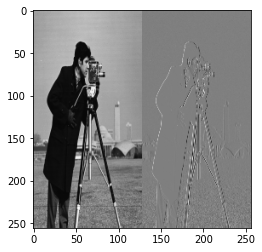

In [62]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [18]:
tmp_l = np.zeros( [height//step,width] )
tmp_h = np.zeros( [height//step,width] )

for i in range(height // step):
    tmp_l[i,:] = img_array[step*i:step*i+step,:].T @ haar_scale
    tmp_h[i,:] = img_array[step*i:step*i+step,:].T @ haar_wavelet

img_array = np.vstack([tmp_l,tmp_h+127])

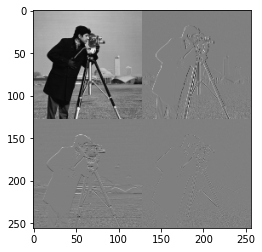

In [19]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [20]:
tmp_l = np.zeros( [height//step,width//step**2] )
tmp_h = np.zeros( [height//step,width//step**2] )

for i in range(width // step**2):
    tmp_l[:,i] = img_array[:height//step,step*i:step*i+step] @ haar_scale
    tmp_h[:,i] = img_array[:height//step,step*i:step*i+step] @ haar_wavelet

img_array[:height//step,:width//step] = np.hstack([tmp_l,tmp_h+127])

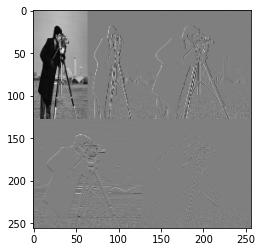

In [21]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [22]:
tmp_l = np.zeros( [height//step**2,width//step] )
tmp_h = np.zeros( [height//step**2,width//step] )

for i in range(height // step**2):
    tmp_l[i,:] = img_array[step*i:step*i+step,:width//step].T @ haar_scale
    tmp_h[i,:] = img_array[step*i:step*i+step,:width//step].T @ haar_wavelet

img_array[:height//step,:width//step] = np.vstack([tmp_l,tmp_h+127])

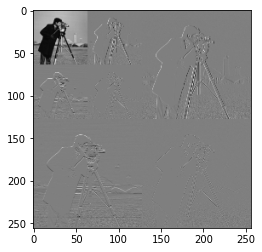

In [23]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

#### 画像2

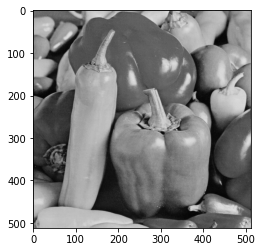

In [203]:
img = Image.open("./peppersTMW.bmp")
img_array = np.array(img)
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [204]:
height,width = img_array.shape

In [205]:
tmp_l = np.zeros( [height,width//step] )
tmp_h = np.zeros( [height,width//step] )

for i in range(width // step):
    tmp_l[:,i] = img_array[:,step*i:step*i+step] @ haar_scale
    tmp_h[:,i] = img_array[:,step*i:step*i+step] @ haar_wavelet

img_array = np.hstack([tmp_l,tmp_h+127])

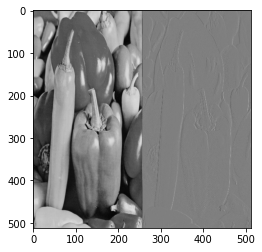

In [206]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [207]:
tmp_l = np.zeros( [height//step,width] )
tmp_h = np.zeros( [height//step,width] )

for i in range(height // step):
    tmp_l[i,:] = img_array[step*i:step*i+step,:].T @ haar_scale
    tmp_h[i,:] = img_array[step*i:step*i+step,:].T @ haar_wavelet

img_array = np.vstack([tmp_l,tmp_h+127])

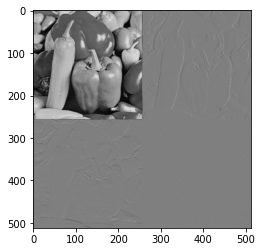

In [208]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [209]:
tmp_l = np.zeros( [height//step,width//step**2] )
tmp_h = np.zeros( [height//step,width//step**2] )

for i in range(width // step**2):
    tmp_l[:,i] = img_array[:height//step,step*i:step*i+step] @ haar_scale
    tmp_h[:,i] = img_array[:height//step,step*i:step*i+step] @ haar_wavelet

img_array[:height//step,:width//step] = np.hstack([tmp_l,tmp_h+127])

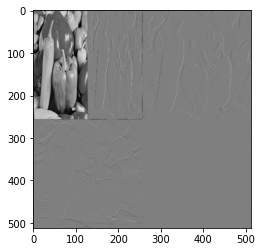

In [210]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()

In [211]:
tmp_l = np.zeros( [height//step**2,width//step] )
tmp_h = np.zeros( [height//step**2,width//step] )

for i in range(height // step**2):
    tmp_l[i,:] = img_array[step*i:step*i+step,:width//step].T @ haar_scale
    tmp_h[i,:] = img_array[step*i:step*i+step,:width//step].T @ haar_wavelet

img_array[:height//step,:width//step] = np.vstack([tmp_l,tmp_h+127])

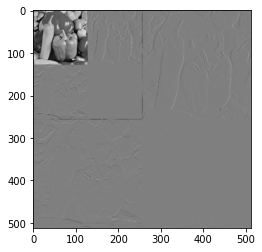

In [212]:
plt.imshow(img_array,cmap="gray",vmin=0,vmax=255)
plt.show()